In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

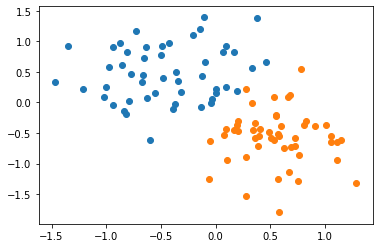

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [8]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b1)/-w2
    plt.plot(x1, x2, 'r')
    scatter_plot()

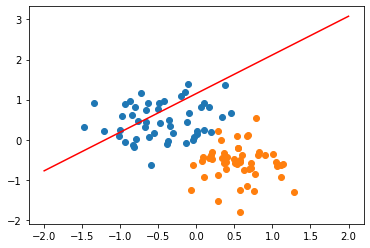

In [9]:
plot_fit('Initial Model')

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
epochs = 1000
losses = []

for i in range(1, epochs+1):
    
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    if i%100 == 0:
        print(f"Epoch: {i}, Loss: {loss.item()}")
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/praneet/venv/ml_dl/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 100, Loss: 0.5297438502311707
Epoch: 200, Loss: 0.46398746967315674
Epoch: 300, Loss: 0.4145325720310211
Epoch: 400, Loss: 0.3762793242931366
Epoch: 500, Loss: 0.3459120988845825
Epoch: 600, Loss: 0.32124829292297363
Epoch: 700, Loss: 0.3008172810077667
Epoch: 800, Loss: 0.28360411524772644
Epoch: 900, Loss: 0.26888954639434814
Epoch: 1000, Loss: 0.2561522126197815


Text(0.5, 0, 'Epochs')

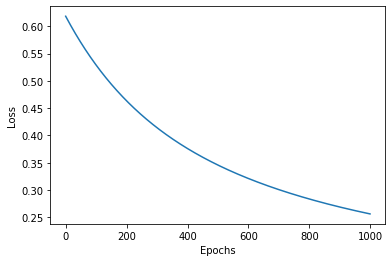

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

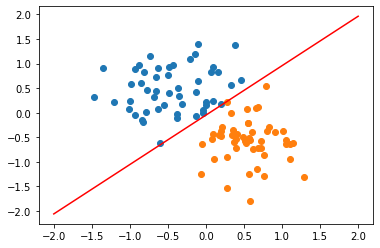

In [13]:
plot_fit('Trained Model')

Red Point positive probability = 0.9424158334732056
Black Point positive probability = 0.05055497586727142
Red Point in class 1
Black Point in class 0


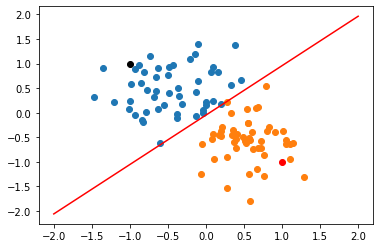

In [14]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print(f'Red Point positive probability = {model.forward(point1).item()}')
print(f'Black Point positive probability = {model.forward(point2).item()}')
print(f'Red Point in class {model.predict(point1)}')
print(f'Black Point in class {model.predict(point2)}')

plot_fit('Trained Model')